# Observed Values

In [2]:
%matplotlib inline


Enter a step value to bin the http response size data: 20000

      http_response_size
0                762847
1                616103
2                621588
3                585836
4                713042
..                  ...
995              648608
996              506802
997              651680
998              679472
999              643981

[1000 rows x 1 columns] 

Minimum packet rate value: 455846
Maximum packet rate value: 916033


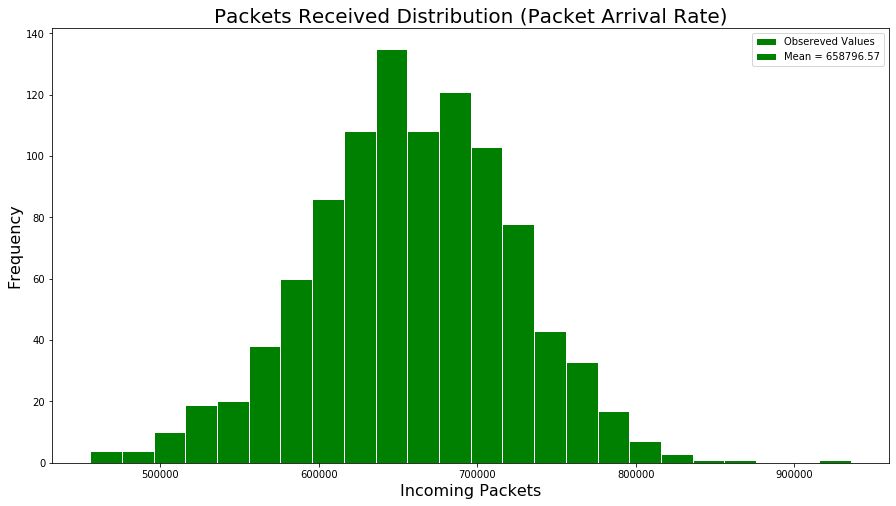

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style
from decimal import Decimal
import math
import time

size_step = float(input("\nEnter a step value to bin the http response size data: "))

# Newly generated data is read in the following block of code for further processing and plotting 
columns = ['http_response_size']
df = pd.read_csv('final_task_SimCN_FinalTask_2020_traces_TeamA2-3s.csv',delimiter=',', skiprows=[0], names=columns)

print("\n", df, "\n")
y = df['http_response_size']

plt.figure(figsize=(15,8))
plt.title('Packets Received Distribution (Packet Arrival Rate)', size = 20)
plt.xlabel('Incoming Packets', size = 16)
plt.ylabel('Frequency', size = 16)
plt.hist(y, bins = range(int(y.min()), int(y.max())+int(size_step), int(size_step)) , color = 'green', ec = 'white', label = True)
plt.legend(['Obsereved Values',f"Mean = {y.mean()}"], loc='upper right')


print(f"Minimum packet rate value: {y.min()}")
print(f"Maximum packet rate value: {y.max()}")


# Expected Values


Enter the number of intervals desired for Chi-Square Test: 9
999

          HTTP Response Size  N_j        np_j  (N_j - np_j)^2/np_j
0  (455845.999, 506977.889]   14    8.388244             3.754279
1  (506977.889, 558109.778]   46   49.742240             0.281539
2  (558109.778, 609241.667]  151  161.675628             0.704924
3  (609241.667, 660373.556]  300  288.637514             0.447295
4  (660373.556, 711505.444]  284  283.364353             0.001426
5  (711505.444, 762637.333]  152  152.969792             0.006148
6  (762637.333, 813769.222]   46   45.353345             0.009220
7  (813769.222, 864901.111]    5    7.369021             0.761602
8    (864901.111, 916033.0]    1    0.654306             0.182643
658796.57
64410.61011753276
[8.388243780587775, 49.74224016646234, 161.67562826369624, 288.6375142693026, 283.3643534616048, 152.9697922526621, 45.35334484501358, 7.369021379981244, 0.6543058499098634]
[455846.0, 506977.8888888889, 558109.7777777778, 609241.6666666666, 66

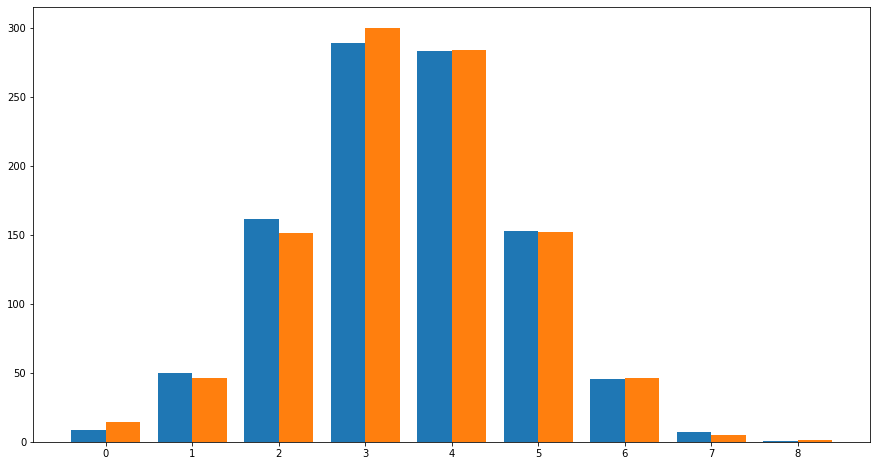

In [68]:
from numpy import savetxt
from scipy.stats import norm
import statistics

np.set_printoptions(suppress=True)

def interval_range():
    interval_range = []
    interval_range.append(obs_min)
    value = obs_min
    for i in range(1, int(k)+1, 1):
        if (value <= obs_max):
            value += interval_size
            interval_range.append(value)
    return interval_range

def np_j_less_than_5(array):
    counter = 0
    for i in array:
        if i < 5.0:
            counter+=1
    return counter

# We are required to generate an expected array with the same mean as the observed array

columns = ['HTTP Response Size']
df = pd.read_csv('final_task_SimCN_FinalTask_2020_traces_TeamA2-3s.csv',delimiter=',', skiprows=[0], names=columns)
y =  df['HTTP Response Size']

run = True
while run:
    try:
        k = float(input("\nEnter the number of intervals desired for Chi-Square Test: ")) #Interval
        
        obs_max = float(y.max())
        obs_min = float(y.min())
        interval_size = (obs_max - obs_min) / k

        equi_distant_table = df["HTTP Response Size"].groupby(pd.cut(df["HTTP Response Size"], 
           interval_range(), include_lowest=True)).count().to_frame('N_j').reset_index()

        n_pts = equi_distant_table['N_j'].sum() # number of data points (sum of occurrances)
        print(n_pts)
        # Observed occurances of data is saved to csv file
        savetxt('observed_http_response_sizes.csv', equi_distant_table['N_j'], delimiter=',')

        # Here we calculate the pdf for each bin and multiply it by the total count to get expected frequency array
        expected_frequency = []
        for i in range(1, int(k) + 1, 1):
            expected_frequency.append(n_pts * (norm.cdf(obs_min + i * interval_size, loc = statistics.mean(y), scale=statistics.stdev(y)) -
                                                       norm.cdf(obs_min + (i-1) * interval_size, loc = statistics.mean(y), scale=statistics.stdev(y)))) 
            #print(obs_min + i * interval_size)

                
        if (k >= 3 and (min(expected_frequency) >= (5 * np_j_less_than_5(expected_frequency))/int(k))):
            equi_distant_table['np_j'] = np.array(expected_frequency)
            equi_distant_table['(N_j - np_j)^2/np_j'] = ((equi_distant_table['N_j'] - 
                                                          equi_distant_table['np_j'])**2)/equi_distant_table['np_j']

            print("\n", equi_distant_table)

            # Expected frequency of data is saved to csv file
            savetxt('expected_http_response_sizes.csv', equi_distant_table['np_j'], delimiter=',')
        else:
            raise Exception
            
    except:
        if (k < 3):
            print(f"\nConsider entering a new interval that is at least 3 !!!")
            run = False
        else:
            print(f"\nConsider entering a new interval that is less than {int(k)} !!!")
            continue 
    else:
        print(statistics.mean(y))
        print(statistics.stdev(y))
        print(expected_frequency)
        
        width = 0.40 
        plt.figure(figsize=(15,8))
        x = np.arange(9)
        x_pos = [i for i, _ in enumerate(x)]
        plt.bar(x, expected_frequency, width)
        
        observed = np.array(equi_distant_table['N_j'],dtype=int)
        plt.bar(x + width, observed, width)
        plt.xticks(x + width/2, x)
        array = interval_range()
        print(array)
        plt.show()
        run = False

460.187
1999


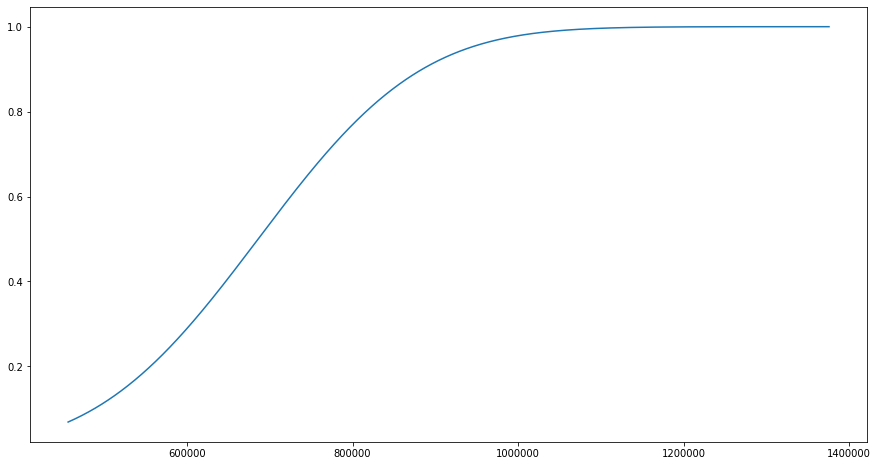

In [86]:
expected_frequency = []
x = []
plt.figure(figsize=(15,8))
interval_size = (obs_max - obs_min) / 1000
print(interval_size)
for i in range(1, 2000, 1 ):
    expected_frequency.append((norm.cdf(obs_min + i * interval_size, loc = statistics.mean(y), scale=statistics.stdev(y))))
    x.append(obs_min + i * interval_size)
plt.plot(x, expected_frequency)

#print(expected_frequency)
print(len(expected_frequency))
plt.show()

10


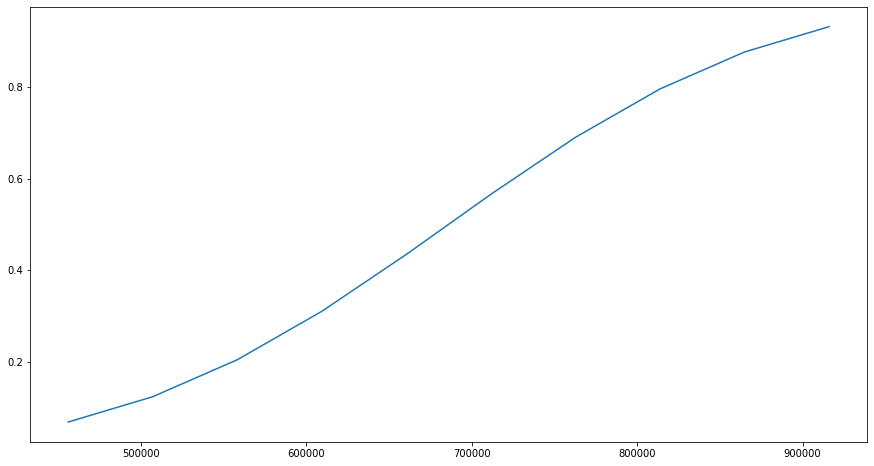

In [74]:
y = np.array(y)
y = np.sort(y, axis=None)
plt.figure(figsize=(15,8))
y3 = norm.cdf(y, loc = statistics.mean(y), scale=statistics.stdev(y))
print(len(y3))
plt.plot(y, y3)

# Chi-Square Test

In [75]:
from scipy.stats import chisquare
from scipy import stats

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

dof = k - 1
crit = stats.chi2.ppf(q=0.95, df=dof) # q here is 1 - alpha, which is 0.05
print(f"Chi-Square Critical Value is {crit}\n---\n")

cols = ['obs']
obs = pd.read_csv('observed_http_response_sizes.csv',delimiter=',', names = cols)
observed_vals = obs['obs']

cols1 = ['exp']
exp = pd.read_csv('expected_http_response_sizes.csv',delimiter=',', names=cols1)
expected_vals = exp['exp']

chisq_sum = equi_distant_table['(N_j - np_j)^2/np_j'].sum()
print(f"Measured Chi-Square Value is {chisq_sum}")

chisq, p = chisquare(observed_vals, f_exp = expected_vals, ddof = 0, axis = 0)
print(f"Chi-Square Value using built-in function is {chisq}")
print(f"P-Value using built-in function is {p}")

if (chisq < crit): print("\nThe null hypothesis, H0, is ACCEPTED!".translate(SUB))
else: print("\nThe null hypothesis, H0, is REJECTED!".translate(SUB))


Chi-Square Critical Value is 15.50731305586545
---

Measured Chi-Square Value is 6.149076061961708
Chi-Square Value using built-in function is 6.149076061961715
P-Value using built-in function is 0.6305373436380846

The null hypothesis, H₀, is ACCEPTED!


In [76]:
print(interval_range())

[455846.0, 478855.35, 501864.69999999995, 524874.0499999999, 547883.3999999999, 570892.7499999999, 593902.0999999999, 616911.4499999998, 639920.7999999998, 662930.1499999998]


10
[455846.         506977.88888889 558109.77777778 609241.66666667
 660373.55555556 711505.44444444 762637.33333333 813769.22222222
 864901.11111111 916033.        ]


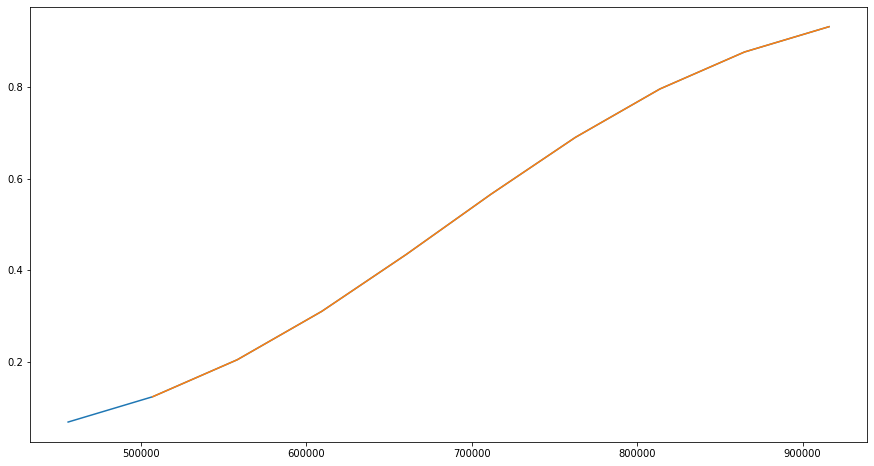

In [83]:
y = np.array(array)
y = np.sort(y, axis=None)
plt.figure(figsize=(15,8))
y3 = norm.cdf(interval_range(), loc = statistics.mean(y), scale=statistics.stdev(y))
print(len(y3))
print((y))
plt.plot(y, y3)
plt.plot(x, expected_frequency)
plt.show()